<a href="https://colab.research.google.com/github/bharath967/Leaves_classification/blob/main/transfer_learning_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [ ]:
import tensorflow as tf
#tf.test.gpu_device_name()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled=ImageDataGenerator(1/255)
trained_fed=rescaled.flow_from_directory('/content/drive/MyDrive/train test3new/train', target_size=(128,128),batch_size=32, class_mode='categorical')
test_fed=rescaled.flow_from_directory('/content/drive/MyDrive/train test3new/test', target_size=(128,128),batch_size=32, class_mode='categorical')

Found 1982 images belonging to 9 classes.
Found 553 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(128, 128, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(128, 128, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(9, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 9)                 18441     
                                                                 
Total params: 23,606,153
Trainable params: 18,441
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history=model.fit(trained_fed, epochs=40, validation_data=test_fed)

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
62/62 [==============================] - 1010s 16s/step - loss: 0.2055 - accuracy: 0.7381 - val_loss: 0.0960 - val_accuracy: 0.8662
Epoch 2/40
62/62 [==============================] - 25s 404ms/step - loss: 0.0462 - accuracy: 0.9596 - val_loss: 0.0696 - val_accuracy: 0.9078
Epoch 3/40
62/62 [==============================] - 25s 403ms/step - loss: 0.0288 - accuracy: 0.9798 - val_loss: 0.0634 - val_accuracy: 0.9078
Epoch 4/40
62/62 [==============================] - 25s 399ms/step - loss: 0.0214 - accuracy: 0.9874 - val_loss: 0.0593 - val_accuracy: 0.9114
Epoch 5/40
62/62 [==============================] - 25s 403ms/step - loss: 0.0164 - accuracy: 0.9939 - val_loss: 0.0596 - val_accuracy: 0.9150
Epoch 6/40
62/62 [==============================] - 25s 405ms/step - loss: 0.0133 - accuracy: 0.9934 - val_loss: 0.0565 - val_accuracy: 0.9114
Epoch 7/40
62/62 [==============================] - 26s 421ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0573 - val_accuracy: 0.9168

In [ ]:
model.save('/content/drive/MyDrive/train test3new/lemonTodayresnet50_leaves_modelwith40epoch.hdf5')

In [ ]:
#=========================================================================================================================================

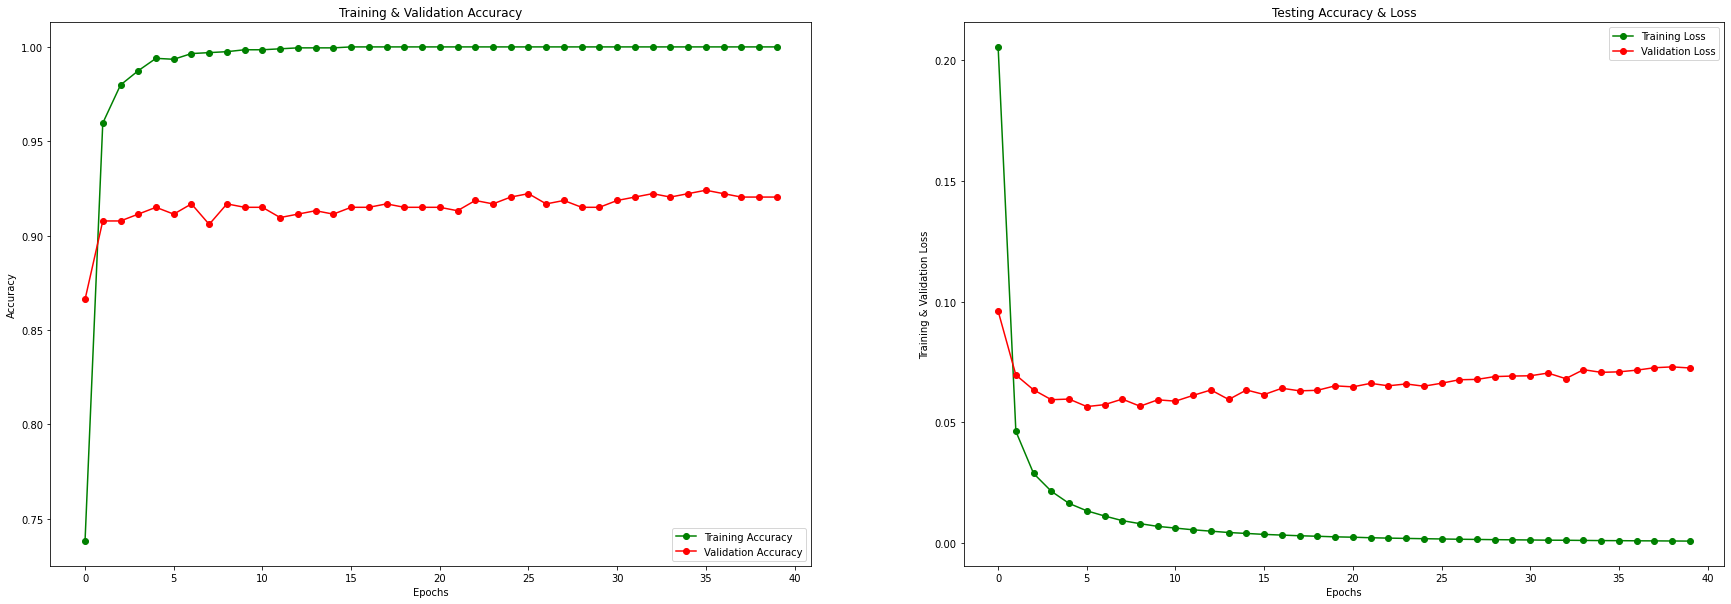

In [ ]:
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
lr_rate=ReduceLROnPlateau(monitor='val_loss')

In [ ]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
#hist=model.fit_generator(trained_fed, epochs=30, validation_data=test_fed,callbacks=[lr_rate])

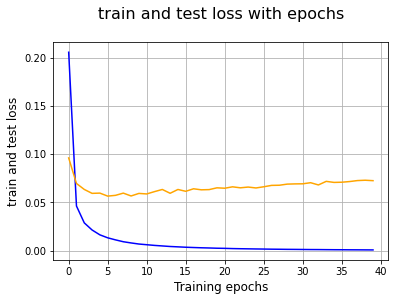

In [ ]:
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("train and test loss with epochs\n",fontsize=16)
plt.xlabel("Training epochs",fontsize=12)
plt.ylabel("train and test loss", fontsize=12)
plt.show()

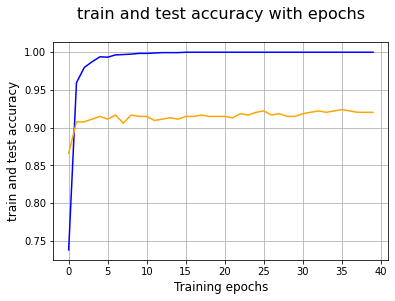

In [ ]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("train and test accuracy with epochs\n",fontsize=16)
plt.xlabel("Training epochs",fontsize=12)
plt.ylabel("train and test accuracy", fontsize=12)
plt.show()

In [ ]:
accuracy=model.evaluate(test_fed,steps=len(test_fed), verbose=2)
print('%.2f'%(accuracy[1]*100))

18/18 - 8s - loss: 0.3873 - accuracy: 0.9204 - 8s/epoch - 449ms/step
92.04


In [ ]:
test_score = model.evaluate_generator(test_fed, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 92.04%
[INFO] Loss:  0.3872720003128052


In [ ]:
import numpy as np

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.figure(figsize=(20,20))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in trained_fed.class_indices:
  target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_fed)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_fed.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_fed.classes, y_pred, target_names=target_names))